In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
DATA_PREFIX = '/mnt/data/jemmons/machine-feature-codec/results/cifar10/lossy-compression'

In [28]:
import matplotlib.pyplot as plt

def make_plots(logfile_csv):
    
    _title_path = os.path.basename(os.path.dirname(logfile_csv))
    
    with open(logfile_csv, 'r') as f:
        lines = f.read().strip().split('\n')
        lines = list(filter(lambda x : '#' not in x, lines))
        lines = lines[1:]
        
        _epochs = []
        _train_top1 = []
        _train_loss = []
        _test_top1 = []
        _test_loss = []
        _checkpoint_files = []
        for line in lines:
            epoch, \
            train_top1, \
            train_loss, \
            test_top1, \
            test_loss, \
            checkpoint_file = line.split(',')

            _epochs.append(int(epoch))
            _train_top1.append(float(train_top1))
            _train_loss.append(float(train_loss))
            _test_top1.append(float(test_top1))
            _test_loss.append(float(test_loss))
            _checkpoint_files.append(checkpoint_file)

        print('top training accuracy: {}'.format(max(_train_top1)))
        print('top validation accuracy: {}'.format(max(_test_top1)))
            
        fig = plt.figure(figsize=(10, 5))
        fig.clear()
        
        ax1 = fig.add_subplot(121)
        ax1.set_ylim([0,1.05])
        ax1.set_title('Training Top-1\n{}'.format(_title_path))
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy (top-1)')
        ax1.plot(_epochs, _train_top1, color="#000000", ls="-", marker="o")
        ax1.plot(_epochs, _test_top1, color="#008080", ls="-", marker="o")

        ax2 = fig.add_subplot(122)
        ax2.set_ylim([0, 1.05])
        ax2.set_title('Training Loss\n {}'.format(_title_path))
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        
        normalized_train_loss = list(map(lambda x: x / max(_train_loss), _train_loss))
        normalized_test_loss = list(map(lambda x: x / max(_test_loss), _test_loss))
        ax2.plot(_epochs, normalized_train_loss, color="#000000", ls="-", marker="o")
        ax2.plot(_epochs, normalized_test_loss, color="#008080", ls="-", marker="o")
        
def summarize_accuracy(filenames, x_labels):
    
    data = []
    for filename in filenames:
        with open(filename, 'r') as f:
            lines = f.read().strip().split('\n')
            lines = list(filter(lambda x : '#' not in x, lines))
            lines = lines[1:]

            _epochs = []
            _train_top1 = []
            _train_loss = []
            _test_top1 = []
            _test_loss = []
            _checkpoint_files = []
            for line in lines:
                epoch, \
                train_top1, \
                train_loss, \
                test_top1, \
                test_loss, \
                checkpoint_file = line.split(',')

                _epochs.append(int(epoch))
                _train_top1.append(float(train_top1))
                _train_loss.append(float(train_loss))
                _test_top1.append(float(test_top1))
                _test_loss.append(float(test_loss))
                _checkpoint_files.append(checkpoint_file)

            data.append({
                'epochs' : _epochs,
                'train_top1' : _train_top1,
                'train_loss' : _train_loss,
                'test_top1' : _test_top1,
                'test_loss' : _test_loss,
                'checkpoint_files' : _checkpoint_files
            })
    
    top_train_acc = []
    top_validation_acc = []
    for d in data:
        #top_train_acc.append(max(d['train_top1']))
        #top_validation_acc.append(max(d['test_top1']))
        top_train_acc.append(d['train_top1'][-1])
        top_validation_acc.append(d['test_top1'][-1])
        
    fig = plt.figure(figsize=(5, 5))
    fig.clear()
        
    ax1 = fig.add_subplot(111)
    ax1.set_ylim([.60,1.05])
    ax1.set_xlim([0, 3500])
    ax1.set_title('Training Top-1\n(cifar10 dataset; resnet18 architecture)')
    ax1.set_xlabel('image_size using JPEG compression (bytes)')
    ax1.set_ylabel('accuracy (top-1)')
    #ax1.set_xscale("log", nonposx='clip')
    ax1.set_xlim(ax1.get_xlim()[::-1])
    l1 = ax1.plot(x_labels, top_train_acc, color="#000000", ls="-", marker="o",label='train_accuracy')
    l2 = ax1.plot(x_labels, top_validation_acc, color="#008080", ls="-", marker="o", label='validation_accuracy')
    for i,j in zip(x_labels,top_validation_acc):
        ax1.annotate(str(round(j,2)),xy=(i+0,j+.01))
    ax1.legend(loc='lower left', shadow=True)

In [29]:
import subprocess
import json
compressed_size = eval(subprocess.check_output(['cat', '/home/jemmons/projects/machine-feature-codec/scratch/cifar10/data/compress_data_summary.json']).decode('utf-8'))
print(json.dumps(compressed_size, indent=4, sort_keys=True))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/jemmons/.virtualenv/machine-feature-coding/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-e383e70db5d9>", line 3, in <module>
    compressed_size = eval(subprocess.check_output(['cat', '/home/jemmons/projects/machine-feature-codec/scratch/cifar10/data/compress_data_summary.json']).decode('utf-8'))
  File "/usr/lib/python3.5/subprocess.py", line 626, in check_output
    **kwargs).stdout
  File "/usr/lib/python3.5/subprocess.py", line 708, in run
    output=stdout, stderr=stderr)
subprocess.CalledProcessError: Command '['cat', '/home/jemmons/projects/machine-feature-codec/scratch/cifar10/data/compress_data_summary.json']' returned non-zero exit status 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jemmons/.virtualenv/machine-feature-coding/lib/python

CalledProcessError: Command '['cat', '/home/jemmons/projects/machine-feature-codec/scratch/cifar10/data/compress_data_summary.json']' returned non-zero exit status 1

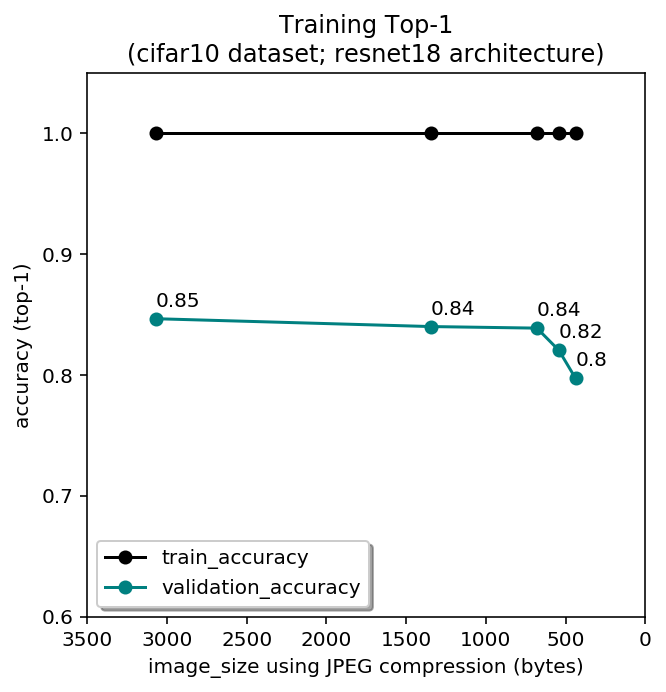

In [30]:
results_dirs = ['libjpeg/arithmetic_q100', 'mini_resnet18_arithmetic_q100', 'mini_resnet18_arithmetic_q90', 'mini_resnet18_arithmetic_q80', 'mini_resnet18_arithmetic_q60']
paths = list(map(lambda x : os.path.join(DATA_PREFIX, x, 'training_log.csv'), results_dirs))
summarize_accuracy(paths, [32*32*3, 1345.11, 679.72, 541.829, 437.554])

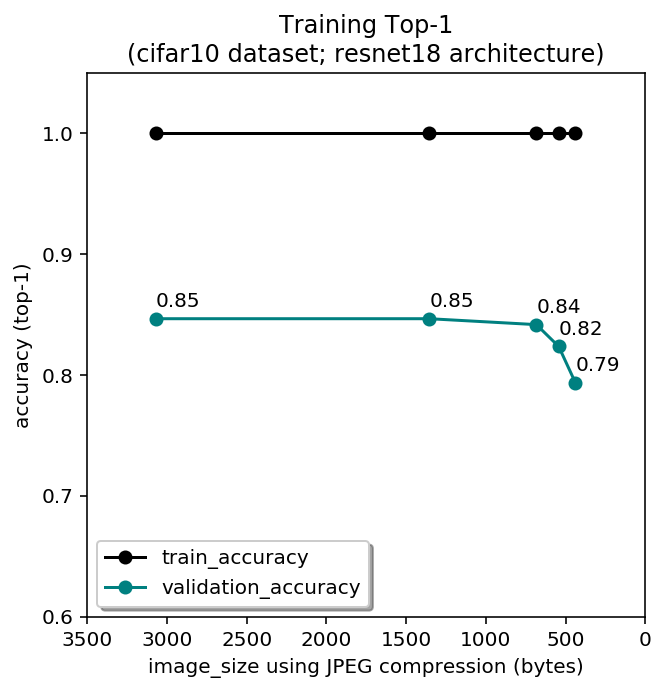

In [31]:
results_dirs = ['arithmetic_q100', 'arithmetic_q100', 'arithmetic_q90', 'arithmetic_q80', 'arithmetic_q60']
paths = list(map(lambda x : os.path.join(DATA_PREFIX, 'libjpeg', x, 'training_log.csv'), results_dirs))
summarize_accuracy(paths, [32*32*3, 1355.28, 682.987, 542.889, 437.91])

In [32]:
def no_plot_summarize_accuracy(filenames):
    
    data = []
    for filename in filenames:
        with open(filename, 'r') as f:
            lines = f.read().strip().split('\n')
            lines = list(filter(lambda x : '#' not in x, lines))
            lines = lines[1:]

            _epochs = []
            _train_top1 = []
            _train_loss = []
            _test_top1 = []
            _test_loss = []
            _checkpoint_files = []
            for line in lines:
                epoch, \
                train_top1, \
                train_loss, \
                test_top1, \
                test_loss, \
                checkpoint_file = line.split(',')

                _epochs.append(int(epoch))
                _train_top1.append(float(train_top1))
                _train_loss.append(float(train_loss))
                _test_top1.append(float(test_top1))
                _test_loss.append(float(test_loss))
                _checkpoint_files.append(checkpoint_file)

            data.append({
                'epochs' : _epochs,
                'train_top1' : _train_top1,
                'train_loss' : _train_loss,
                'test_top1' : _test_top1,
                'test_loss' : _test_loss,
                'checkpoint_files' : _checkpoint_files
            })
            
    return data


Text(1.025,3572,'uncompressed input size')

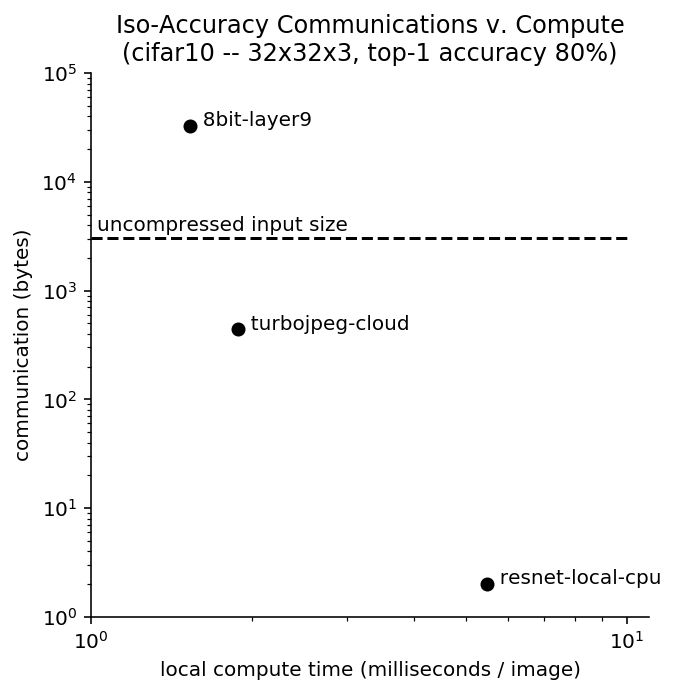

In [79]:
files = ['libjpeg/supermini_resnet18_uncompressed.rerun', 'libjpeg/mini_resnet18_arithmetic_q60']
paths = list(map(lambda x : os.path.join(DATA_PREFIX, x, 'training_log.csv'), files))
data = no_plot_summarize_accuracy(paths)

noop = 0.12
x_compute = list(map(lambda x: x-noop, [1.65, 2.0, 5.6]))
y_network = [16*16*128, 437.554+1.0, 2.0]
label = ['8bit-layer9', 'turbojpeg-cloud', 'resnet-local-cpu']
# x_compute = [2.0, 5.8]
# y_network = [437.554+1.0, 2.0]
# label = ['turbojpeg-cloud', 'resnet-local-cpu']

fig = plt.figure(figsize=(5, 5))
fig.clear()

ax1 = fig.add_subplot(111)
ax1.set_xlim([1, 11])
ax1.set_ylim([1,10**5])
ax1.set_title('Iso-Accuracy Communications v. Compute\n(cifar10 -- 32x32x3, top-1 accuracy 80%)')
ax1.set_ylabel('communication (bytes)')
ax1.set_xlabel('local compute time (milliseconds / image)')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
l1 = ax1.plot(x_compute, y_network, color="#000000", ls='', marker="o")
for l,i,j in zip(label,x_compute,y_network):
    ax1.annotate('  '+l,xy=(i,j))
    
ax1.plot([1,10], [32*32*3, 32*32*3], color="#000000", ls='--')
ax1.annotate('uncompressed input size',xy=(1.025,32*32*3+500))

top training accuracy: 1.0
top validation accuracy: 0.7916


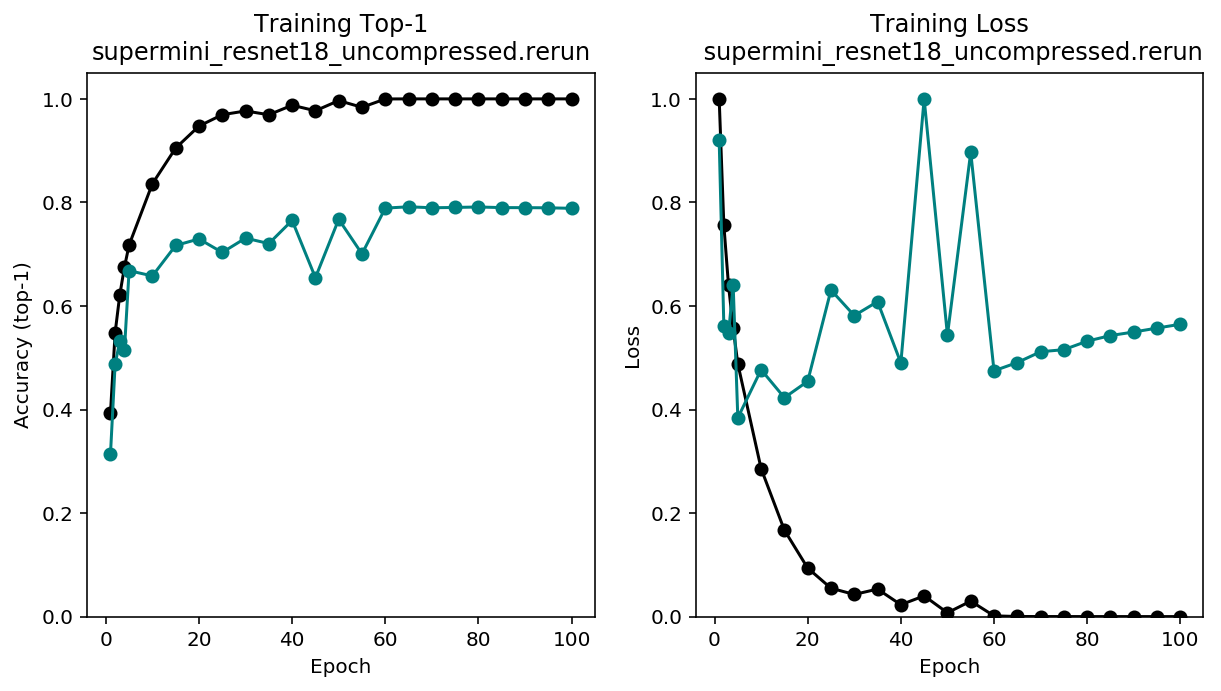

In [545]:
results_dir = 'supermini_resnet18_uncompressed.rerun'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8354


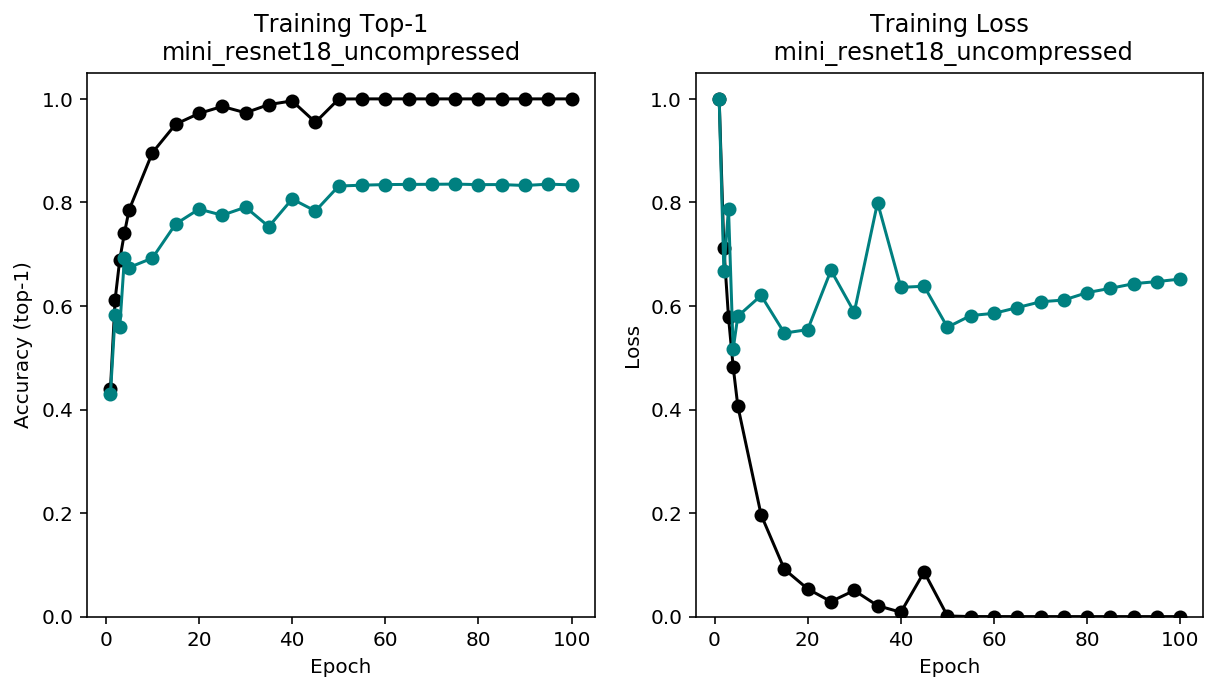

In [546]:
results_dir = 'libjpeg/mini_resnet18_uncompressed'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8422


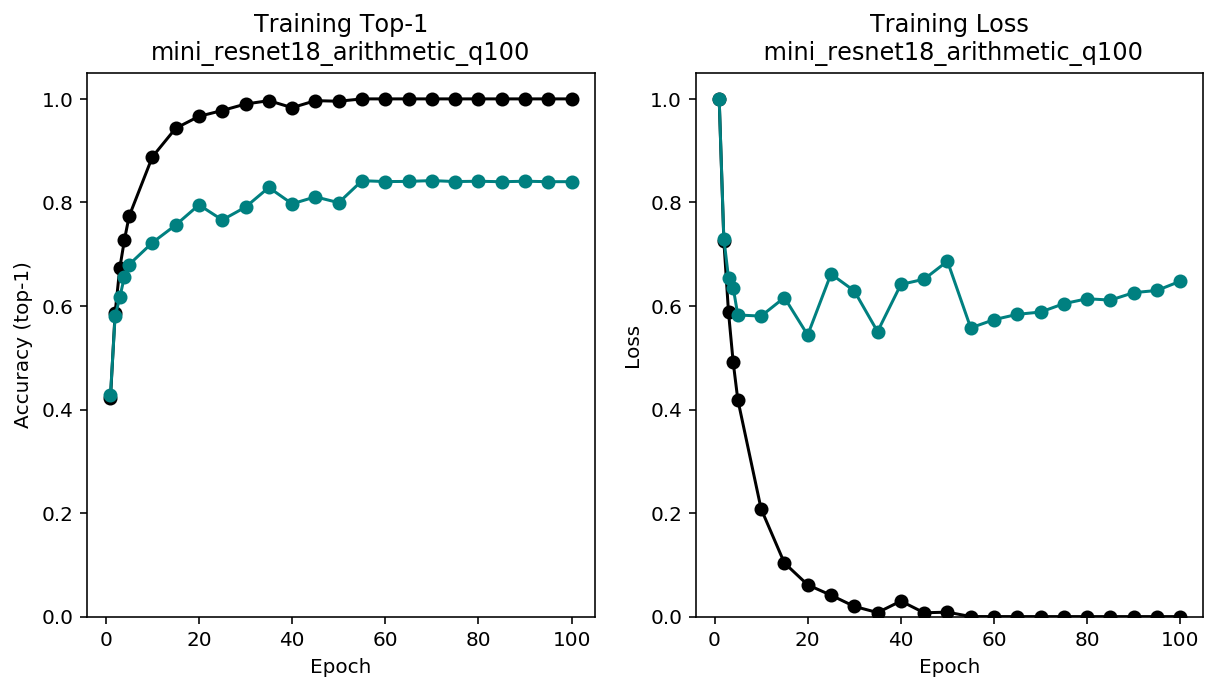

In [547]:
results_dir = 'mini_resnet18_arithmetic_q100'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8416


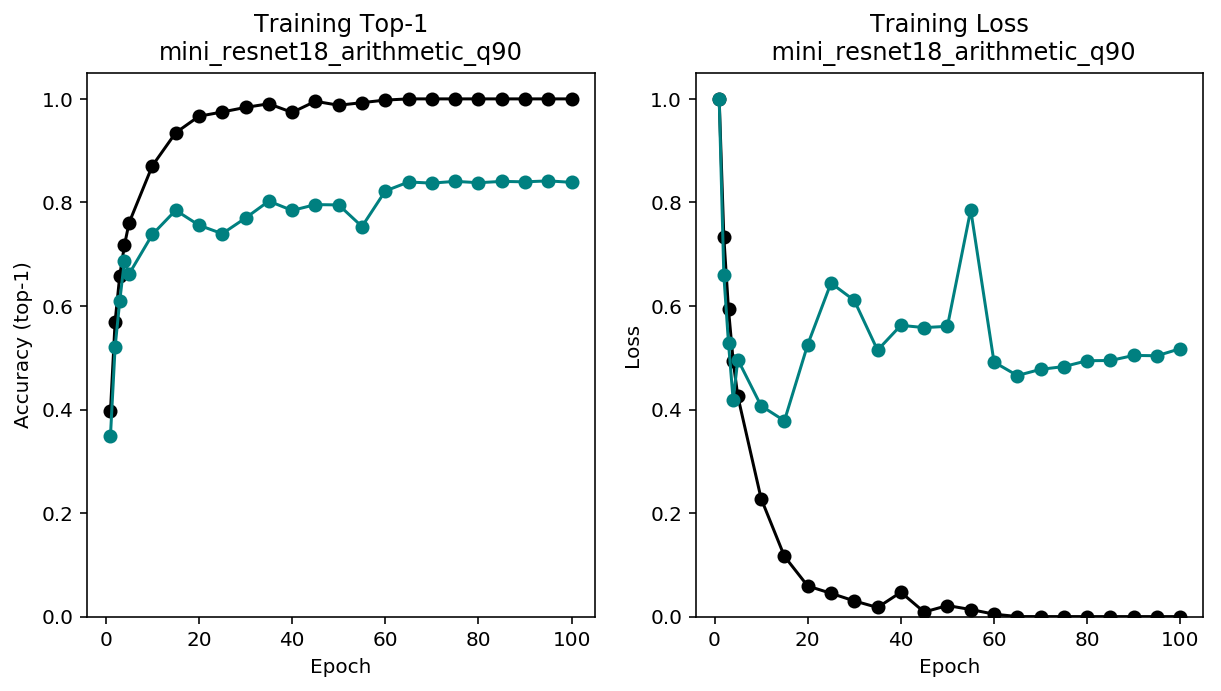

In [548]:
results_dir = 'mini_resnet18_arithmetic_q90'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8221


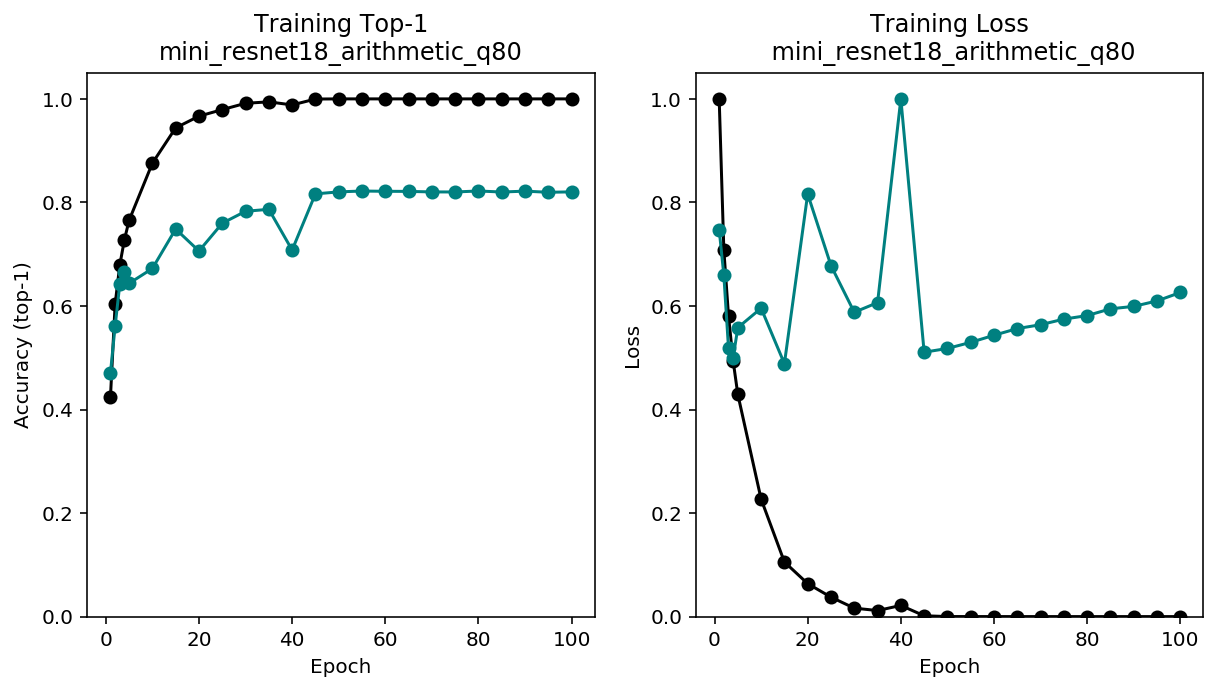

In [549]:
results_dir = 'mini_resnet18_arithmetic_q80'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8015


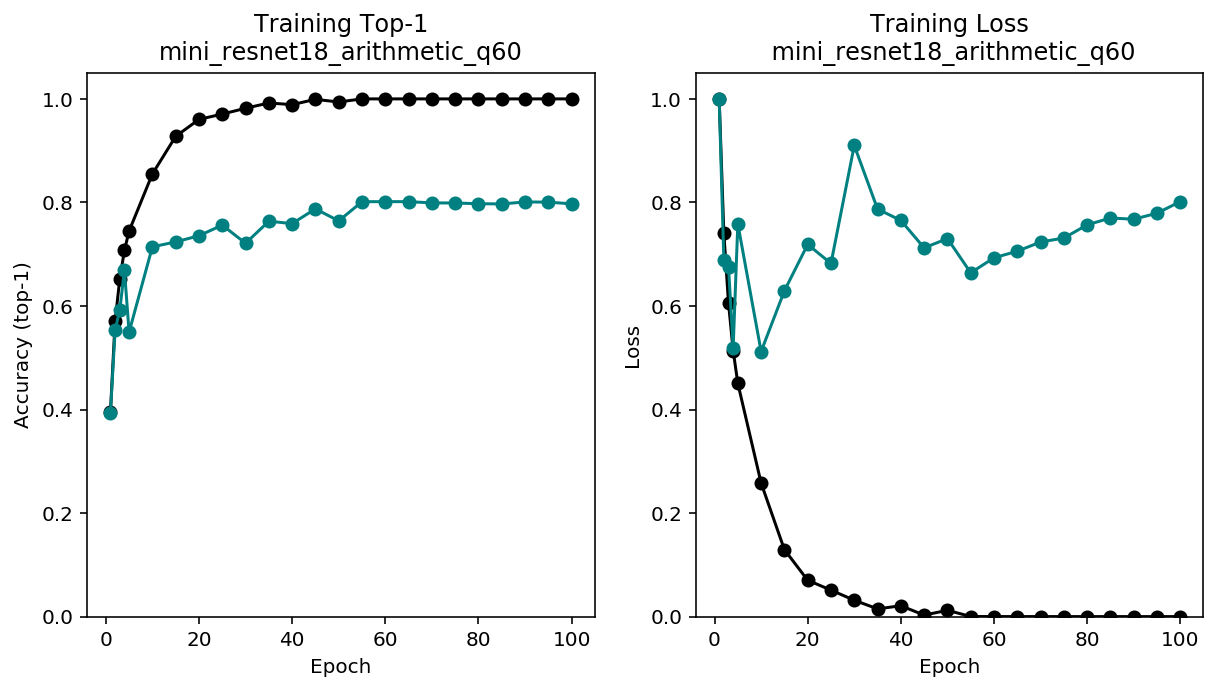

In [550]:
results_dir = 'mini_resnet18_arithmetic_q60'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

# ---- Old Results Below ----

top training accuracy: 1.0
top validation accuracy: 0.8427


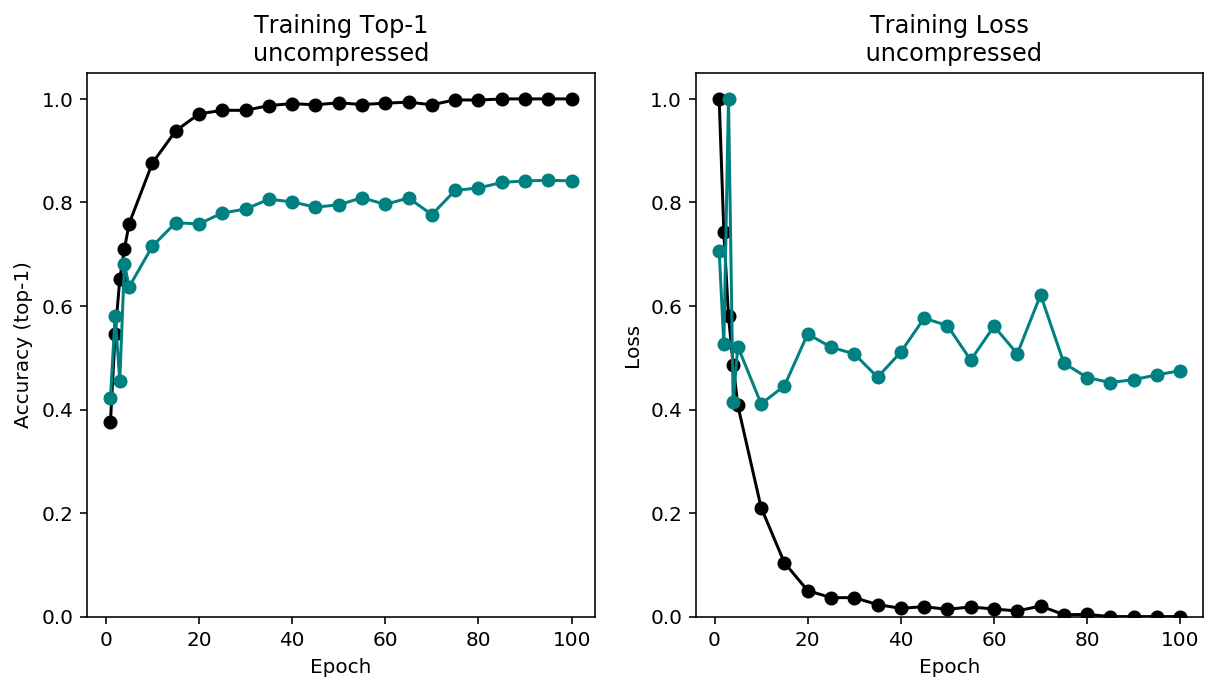

In [401]:
results_dir = 'uncompressed'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8491


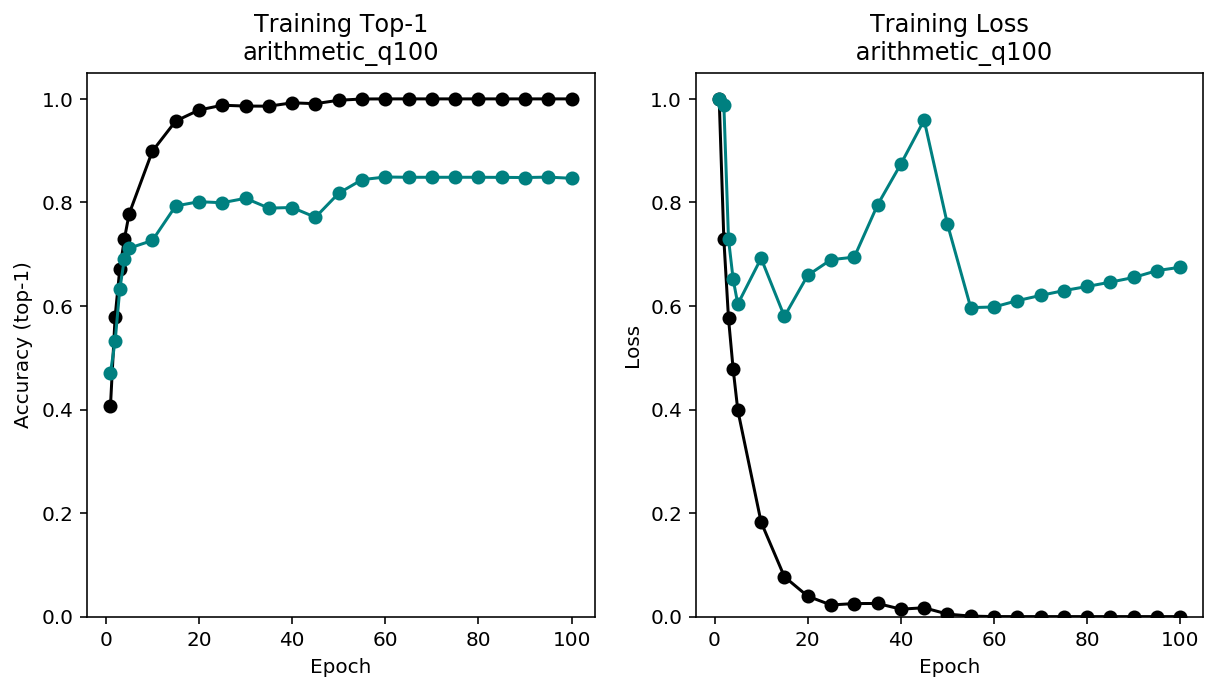

In [402]:
results_dir = 'arithmetic_q100'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8417


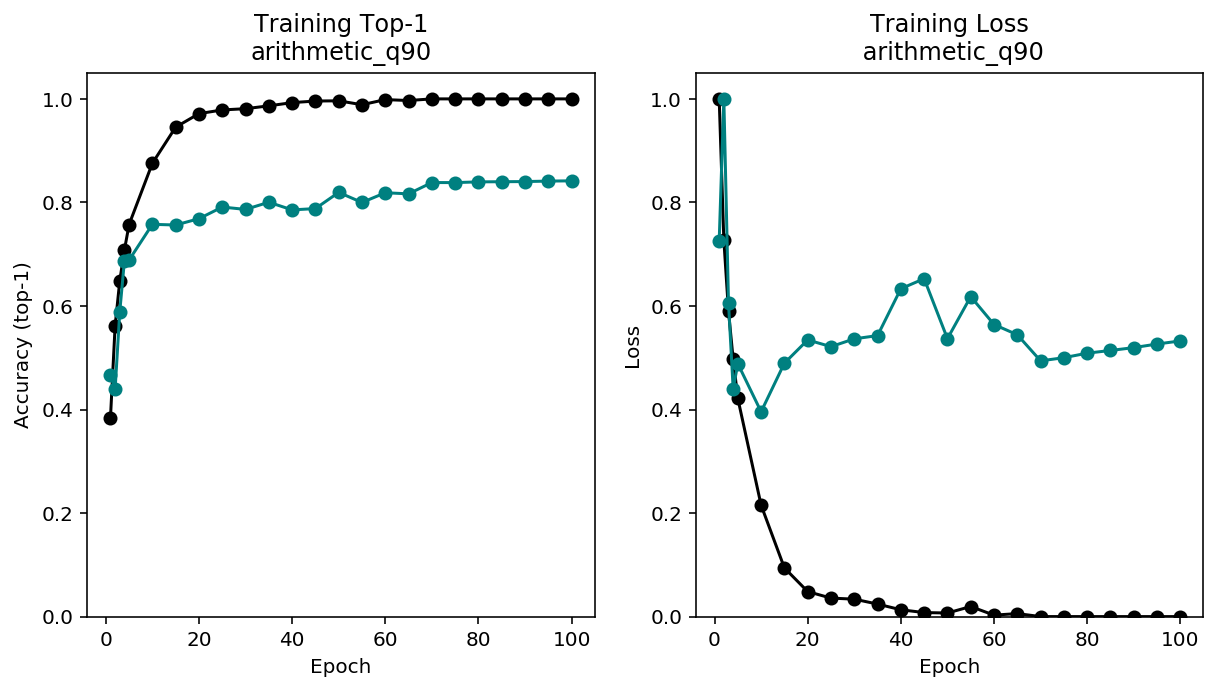

In [403]:
results_dir = 'arithmetic_q90'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8236


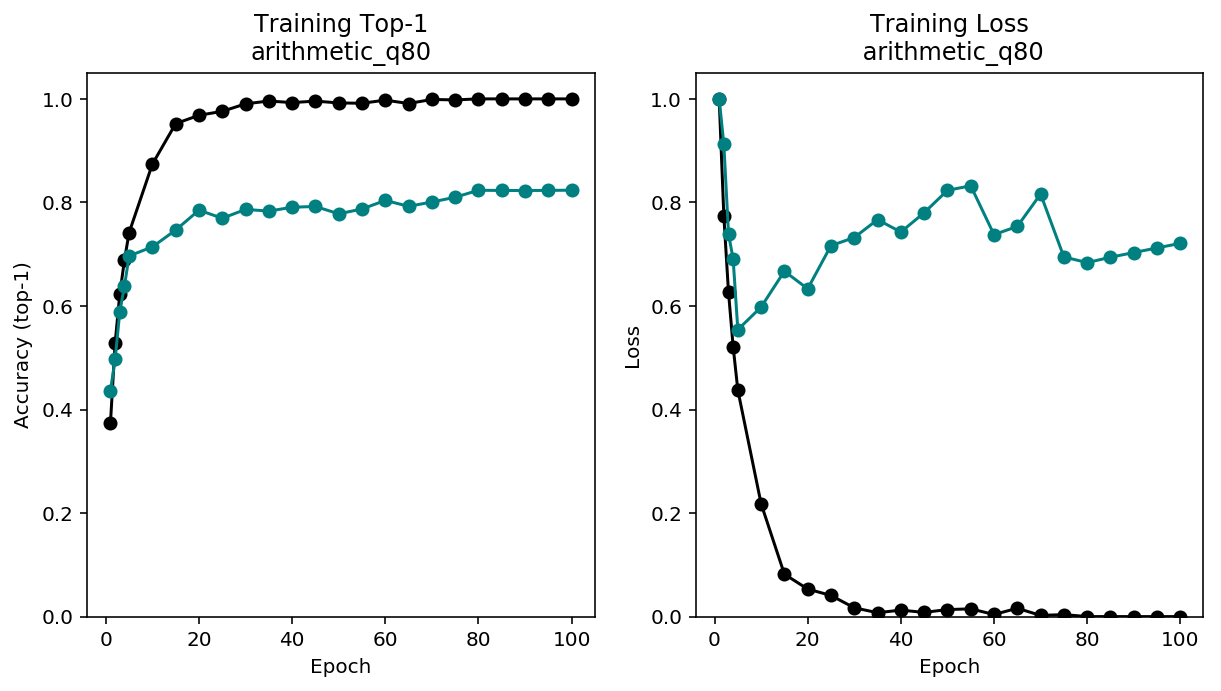

In [404]:
results_dir = 'arithmetic_q80'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.7935


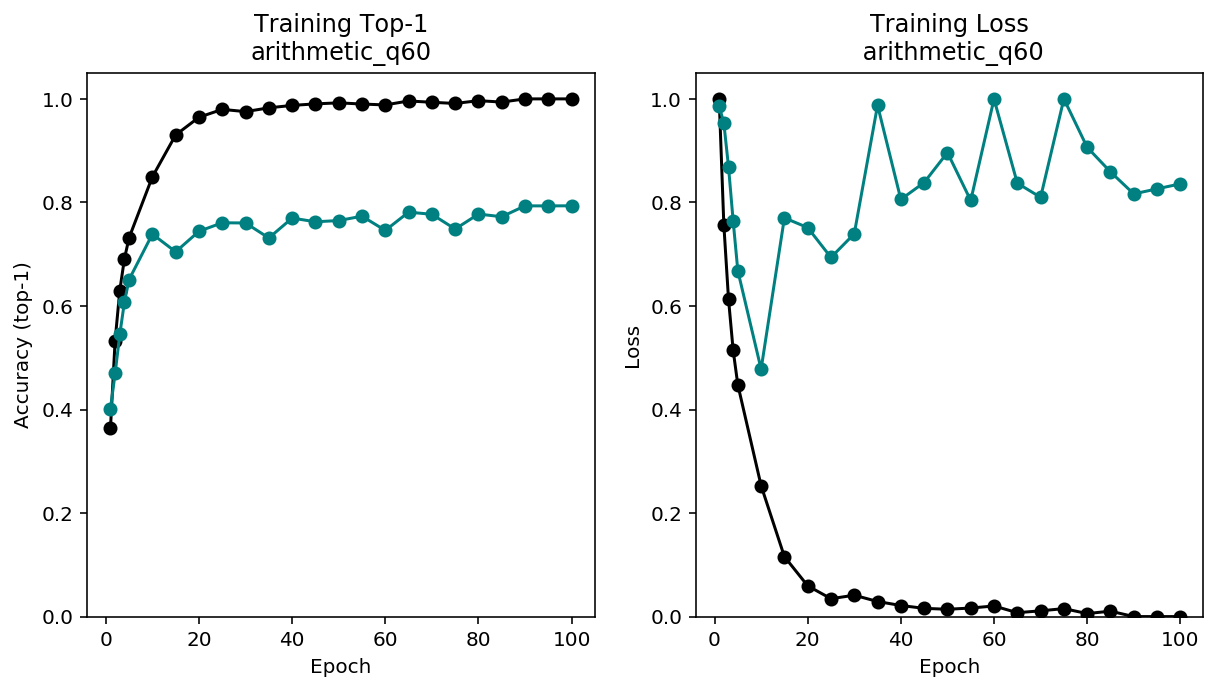

In [405]:
results_dir = 'arithmetic_q60'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8447


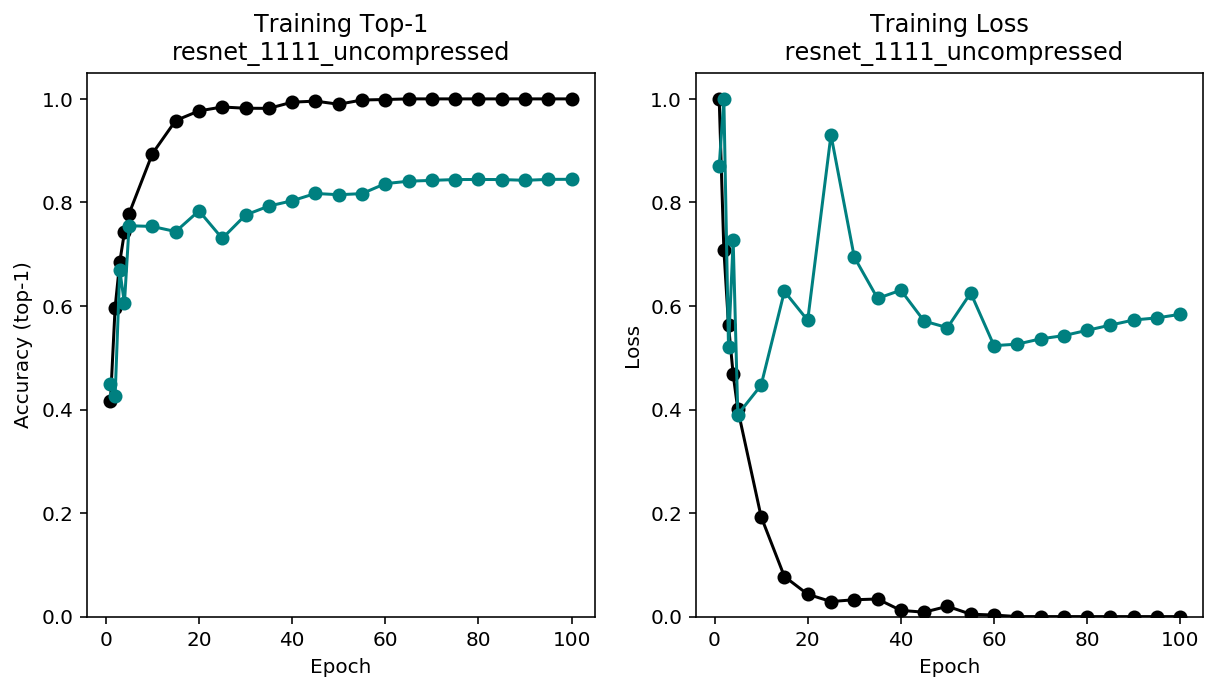

In [406]:
results_dir = 'resnet_1111_uncompressed'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8444


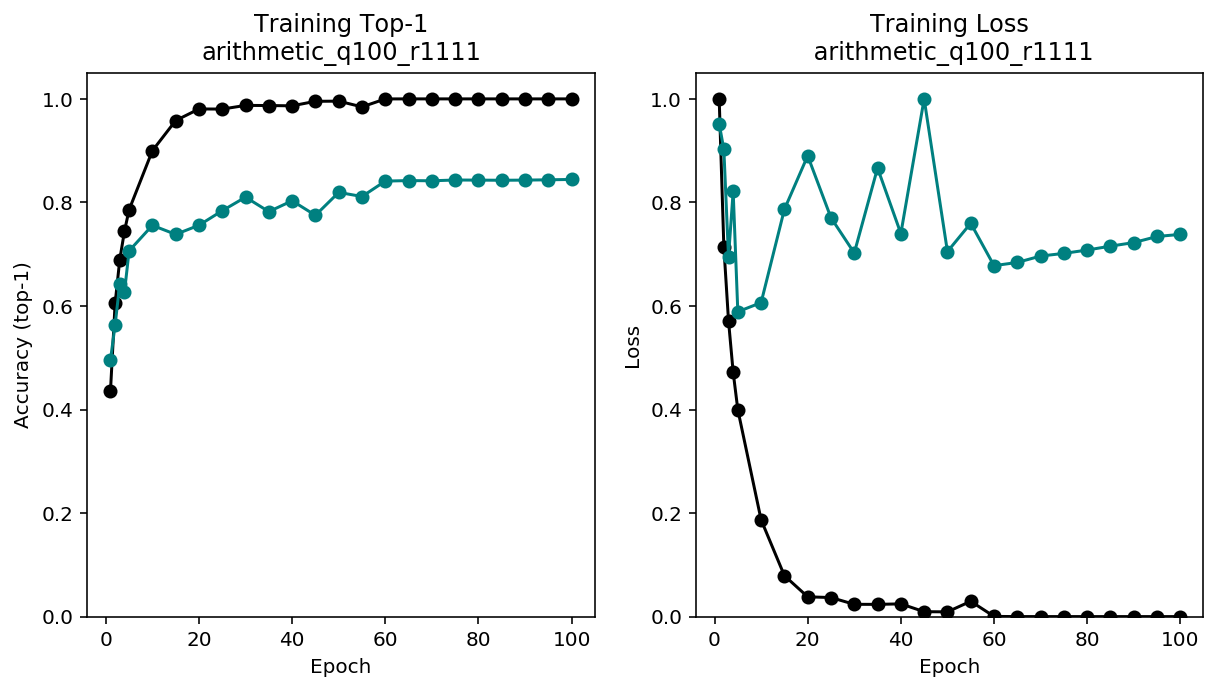

In [407]:
results_dir = 'arithmetic_q100_r1111'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8045


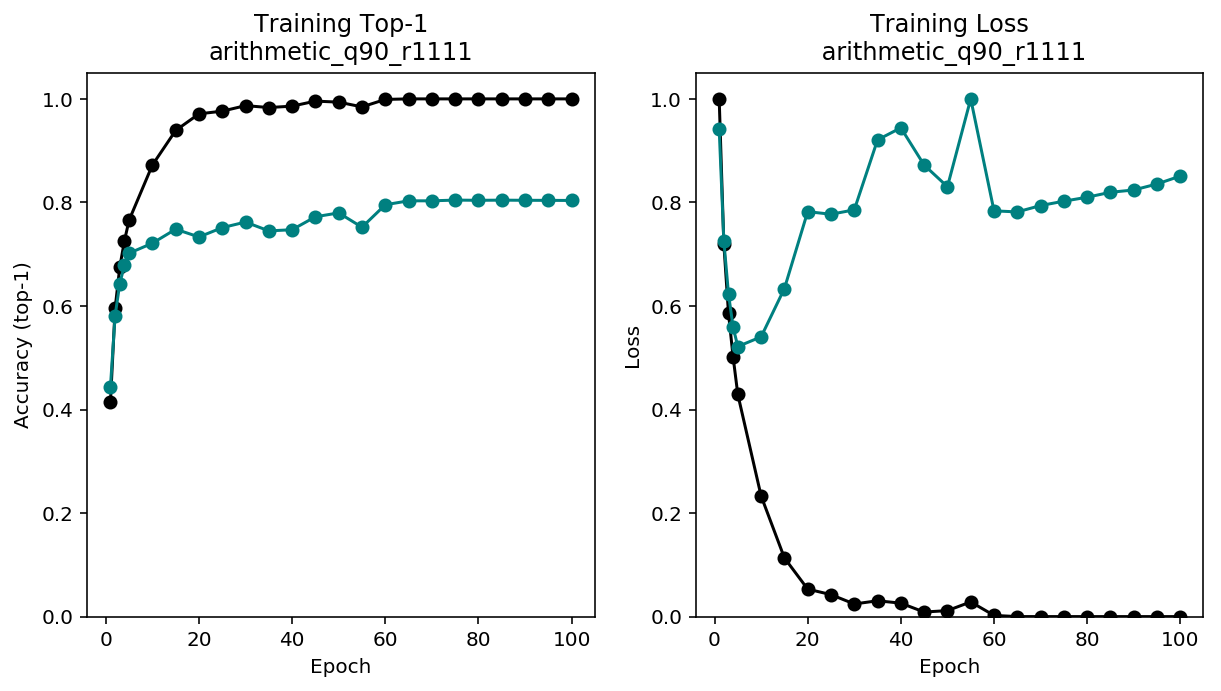

In [408]:
results_dir = 'arithmetic_q90_r1111'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8253


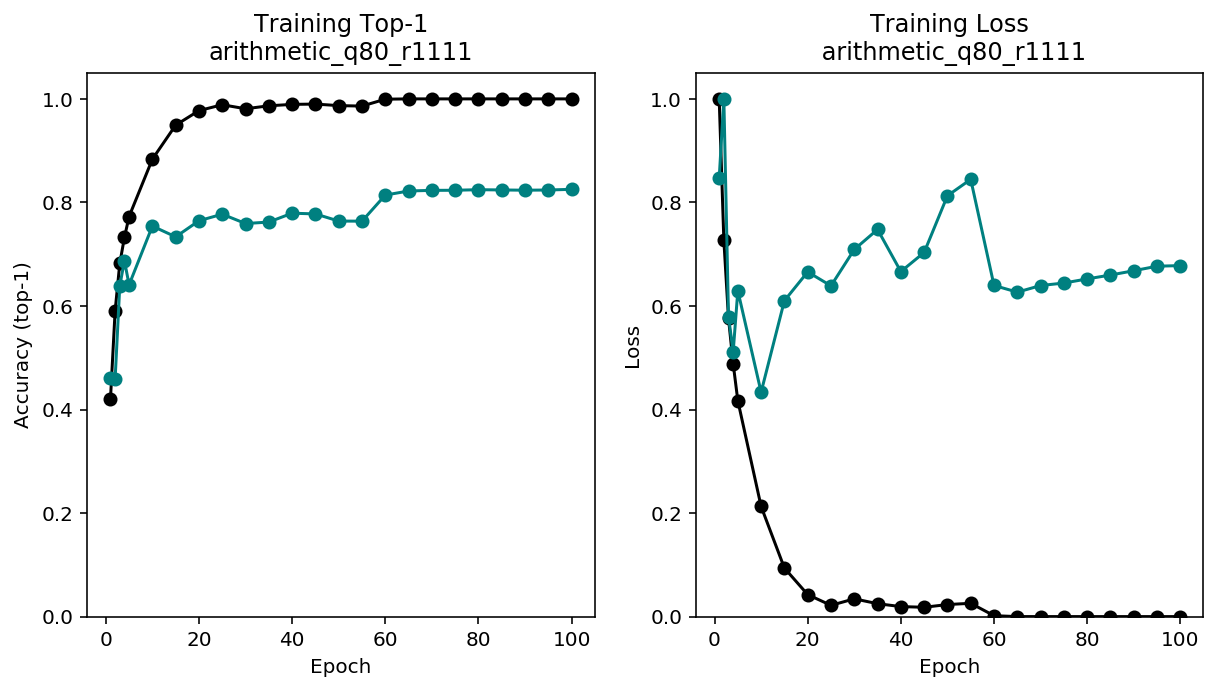

In [409]:
results_dir = 'arithmetic_q80_r1111'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8447


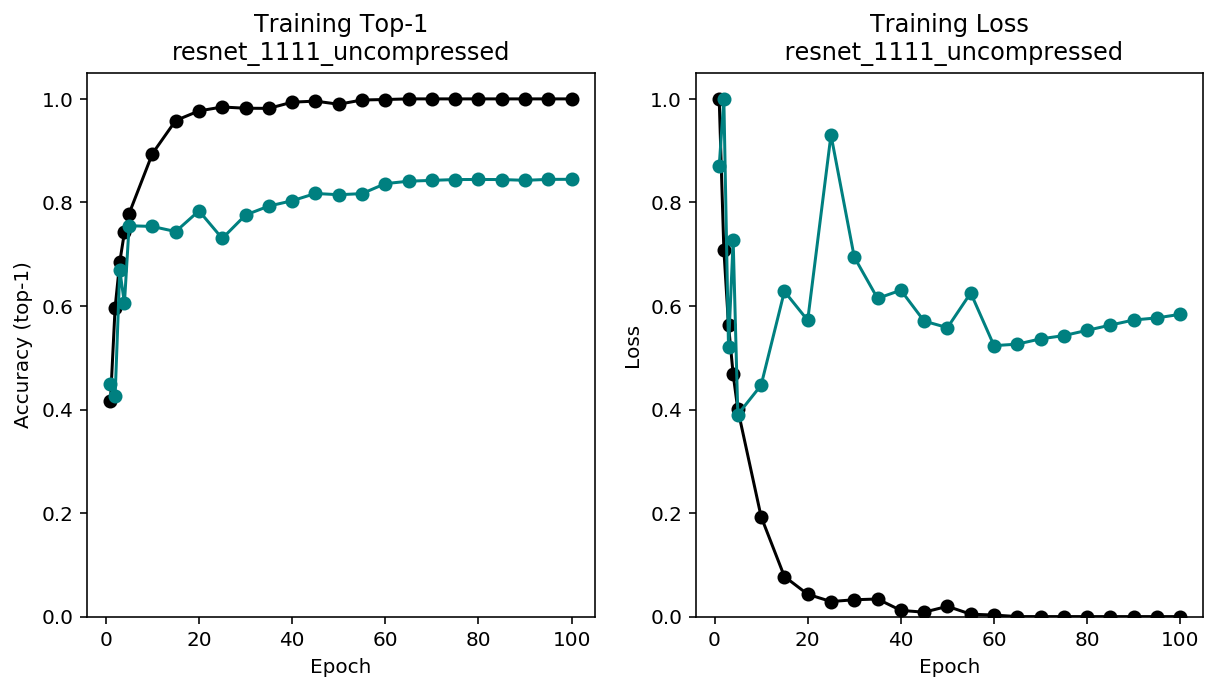

In [410]:
results_dir = 'resnet_1111_uncompressed'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8542


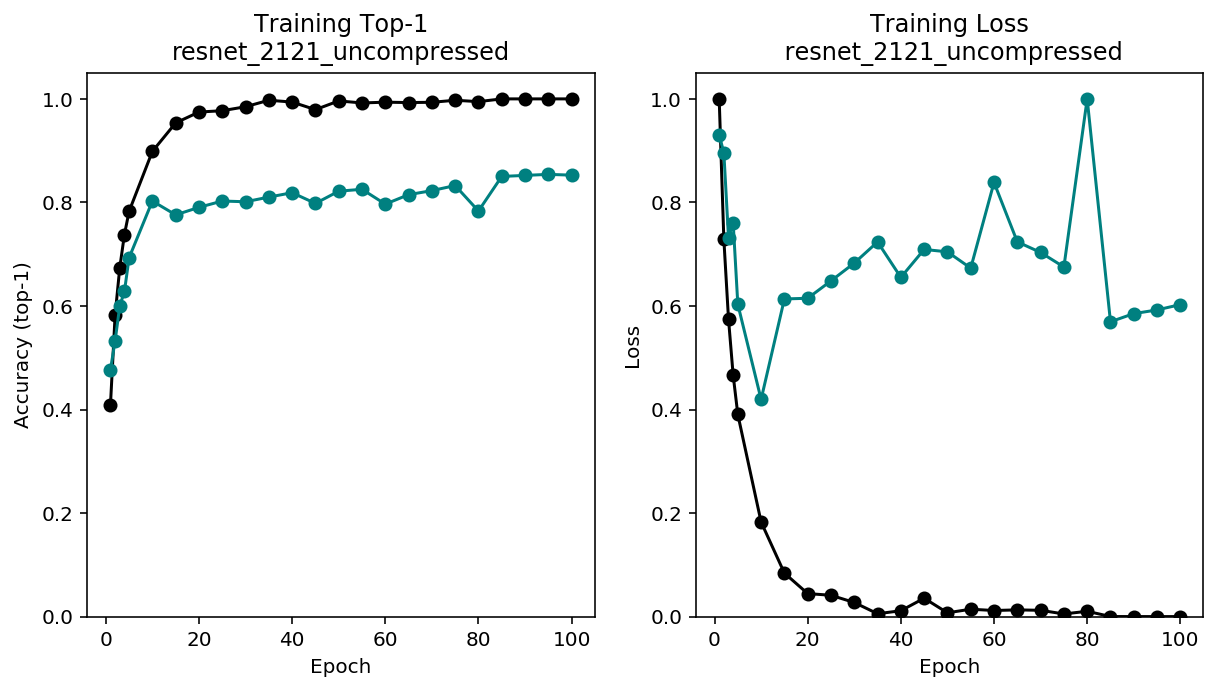

In [411]:
results_dir = 'resnet_2121_uncompressed'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.8448


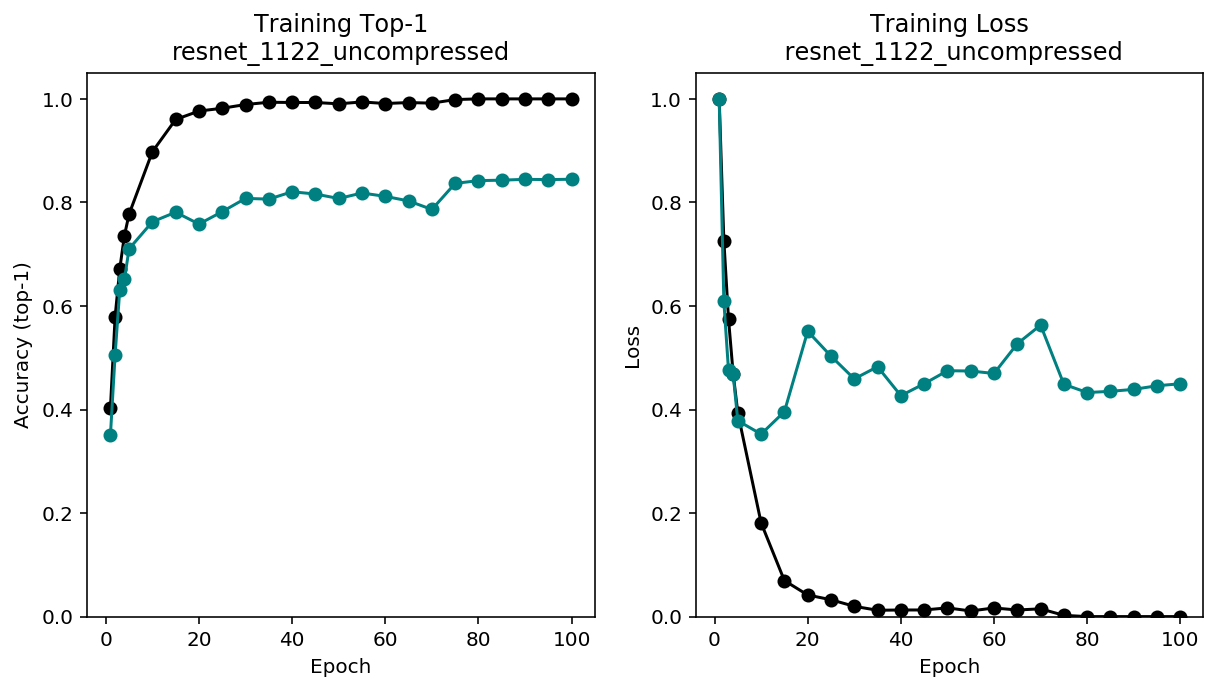

In [412]:
results_dir = 'resnet_1122_uncompressed'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)